In [1]:
from maelzel.core import *

end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance


In [2]:
getPreset('?')

Preset: pulse  
    routing=True
  |ktransp=0.0, klag=0.1, kpwm=0.5|
  ; transposable pulse with pwm
  ; Args:
  ;   ktransp: transposition
  ;   klag: lag time for pitch
  ;   kpwm: pwm between 0-1
  aout1 vco2 kamp, mtof:k(lag:k(kpitch+ktransp, klag), 2, kpwm

In [3]:
presetManager.showPresets('*', full=True)


In [4]:
s = playSession(latency=0)




--Csound version 6.19 (double samples) May  8 2024
[commit: 937aa495e250d758efaa28e9697a8b75237c80cd]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [5]:
foo = defPreset('foo', r'''
|ibusL, ibusR|
prints "ibusL: %d, ibusR: %d\n", ibusL, ibusR
aout1 vco2 kamp, kfreq
aout2 vco2 kamp, kfreq+4

busmix ibusL, aout1
busmix ibusR, aout2
''', output=False)

s.defInstr('master', r'''
    |ibusL, ibusR, kgain=1|
    aL busin ibusL
    aR busin ibusR
    outch 1, aL * kgain, 2, aR * kgain
    ''')

Instr(master, ibusL=0, ibusR=0, kgain=1)

In [6]:
busL = s.assignBus()
busR = s.assignBus()


In [7]:
master = s.sched('master', args=dict(ibusL=busL, ibusR=busR), priority=2)

In [8]:
Note(60.5, 30).play(instr='foo', gain=0.01, ibusL=busL, ibusR=busR)

ibusL: 0, ibusR: 1


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(▶ preset:foo=501.0002 start=7.416 dur=30.000 p4=0.5 kpos=0.01 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 …)

In [9]:
master.set('kgain', 0.5)

In [10]:
master.stop()

In [11]:
foo = s.defInstr('foo', r'''
    |itime, Sfoo|
    ielapsed times
    prints "Sfoo: %s, itime: %f, ielapsed: %f, diff: %f\n", Sfoo, itime, ielapsed, ielapsed - itime 
    turnoff
''', priority=1)

In [12]:
s.sched("foo", 0, 1, args={'Sfoo': 'bar', 'itime': s.engine.realElapsedTime()})

Button(description='Stop', style=ButtonStyle())

Sfoo: bar, itime: 20.582667, ielapsed: 20.588000, diff: 0.005333


Output()

Synth(▶ foo=502.0002 start=20.583 dur=1.000 p4=20.5827 itime=bar)

In [13]:
s.engine._strToIndex

{'cos': 20, 'linear': 21, 'smooth': 22, 'smoother': 23, 'bar': 24}

In [14]:
test = s.defInstr('test', r'''
    |istrid|
    S0 = strget(istrid)
    prints "S0: %s\n", S0
    turnoff
''')

In [15]:
jiji = s.engine.strSet('jiji')

In [16]:
s.sched('test', 0, 1, args={'istrid': jiji})

S0: jiji


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ test=503.0002 start=34.359 dur=1.000 p4=25)

In [17]:
test = s.defInstr('test', r'''
    |ichan=0|
    prints "ichan: %d\n", ichan
    Schan = "bar"
    ; Schan strget ichan
    prints "Schan: %s\n", Schan
    a0 oscili 0.1, 1000
    ; chnset a0, Schan
''')


In [18]:
print(s.generateInstrBody(test))

ichan = p5
prints "ichan: %d\n", ichan
Schan = "bar"
; Schan strget ichan
prints "Schan: %s\n", Schan
a0 oscili 0.1, 1000
; chnset a0, Schan
atstop 1, 0.01, 0, p1


In [19]:
ichan = s.engine.strSet('foo')
ichan

26

In [20]:
s.sched('test', args={'ichan': 0})

ichan: 0
Schan: bar


Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ test=503.0003 start=41.815 dur=-1.000 p4=0)

In [1]:
from maelzel.core import *

preset = defPreset('mysynth', r'''
|idecratio=2, isust=0.1|
asig vco2 kamp, kfreq, 12
asig *= adsr(ifadein, ifadein*idecratio, isust, ifadeout) 
asigL, asigR pan2 asig, kpos
chnmix asigL, "left"
chnmix asigR, "right"
''')
preset

end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance


Preset: mysynth  
    routing=False
  |idecratio=2.0, isust=0.1|
  asig vco2 kamp, kfreq, 12
  asig *= adsr(ifadein, ifadein*idecratio, isust, ifadeout) 
  asigL, asigR pan2 asig, kpos
  chnmix asigL, "left"
  chnmix asigR, "right"

In [2]:
session = getSession()
session.defInstr('reverb', r'''
|kwet=0.8, kfeedback=0.85, kcutoff=12000, ipitchmod=0.3|
aleft = chnget:a("left")
aright = chnget:a("right")
awetL, awetR reverbsc aleft, aright, kfeedback, kcutoff, sr, ipitchmod
outch 1, awetL * kwet + aleft * (1 - kwet), 2, awetR * kwet + aright * (1 - kwet)
chnclear "left", "right"
''')





--Csound version 6.19 (double samples) Oct 13 2024
[commit: 937aa495e250d758efaa28e9697a8b75237c80cd]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Instr(reverb, kwet=0.8, kfeedback=0.85, kcutoff=12000, ipitchmod=0.3)

In [30]:
reverb = session.sched('reverb', priority=2, kwet=0.85, kfeedback=0.74)


In [27]:
chain = Chain([Note(p, 1).setPlay(instr='mysynth', fade=(0.01, 0.1), idecratio=1, isust=0.2, sustain=-0.25, gain=0.1)
               for p in range(48, 100)])
# chain

In [31]:
chain.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=52)
    Synth(𝍪 preset:mysynth=501.0782 start=316.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0783 start=317.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0784 start=318.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0785 start=319.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0786 start=320.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0787 start=321.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0788 start=322.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0789 start=323.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.079 start=324.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0791 start=325.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0792 start=326.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0793 start=327.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0794 start=328.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0795 start=329.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0796 start=330.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0797 start=331.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0798 start=332.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0799 start=333.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.08 start=334.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0801 start=335.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0802 start=336.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0803 start=337.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0804 start=338.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0805 start=339.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0806 start=340.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0807 start=341.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0808 start=342.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0809 start=343.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.081 start=344.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0811 start=345.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.01 …)
    Synth(𝍪 preset:mysynth=501.0812 start=346.114 dur=1.000 p4=0.5 kpos=0.1 kgain=17 id

In [6]:
reverb.ui()

Button(description='Stop', style=ButtonStyle())

FloatSlider(value=12000.0, description='kcutoff', layout=Layout(width='80%'), max=120000.0, readout_format='d'…

FloatSlider(value=0.7, description='kfeedback', layout=Layout(width='80%'), max=2.0, readout_format='.3f', ste…

FloatSlider(value=0.5, description='kwet', layout=Layout(width='80%'), max=2.0, readout_format='.3f', step=0.0…

In [35]:
chain.synthEvents()[:5]

[SynthEvent(delay=0, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 48 0.515178; 0.25s 48 0.515178›),
 SynthEvent(delay=0.25, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 49 0.515178; 0.25s 49 0.515178›),
 SynthEvent(delay=0.5, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 50 0.515178; 0.25s 50 0.515178›),
 SynthEvent(delay=0.75, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 51 0.515178; 0.25s 51 0.515178›),
 SynthEvent(delay=1, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 52 0.515178

4C♯+15:1♩
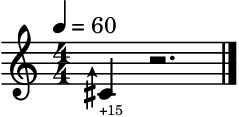

In [32]:
Note("4C#+15")